# 3.YOLOv3
シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOv3[2]のKeras実装を使います。

[qqwweee/keras-yolo3: A Keras implementation of YOLOv3 (Tensorflow backend)](https://github.com/qqwweee/keras-yolo3)

[2]Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement

[https://pjreddie.com/media/files/papers/YOLOv3.pdf](https://pjreddie.com/media/files/papers/YOLOv3.pdf)

Sprint18で使用した実装（再掲）

[lasershow/SimpsonRecognition: Detect and recognize The Simpsons characters using Keras and Faster R-CNN](https://github.com/lasershow/SimpsonRecognition)



# 【問題3】学習済みの重みによる推定
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startに記載されています。

まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。

出力結果を課題の一部として提出してください。

## 出力結果
### 画像①

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


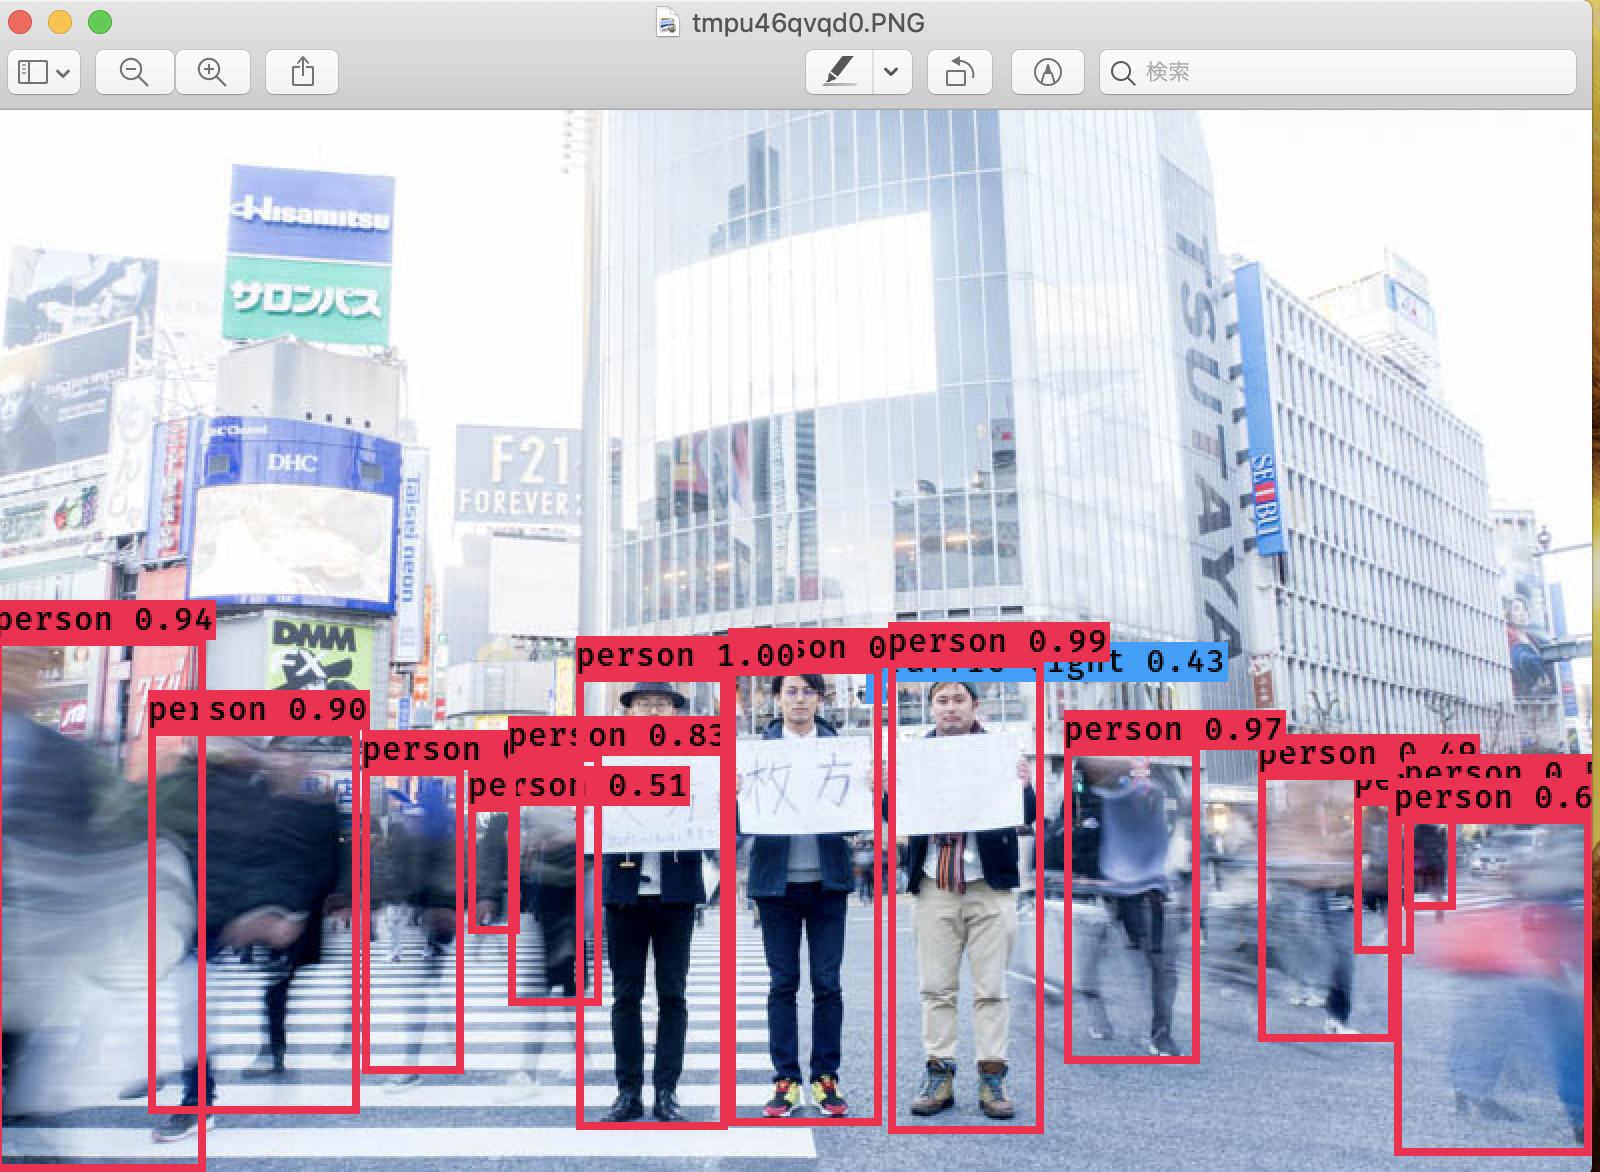

In [1]:
from IPython.display import Image, display_png
display_png(Image('photo5_predict.png'))

### 画像①についての考察
- 上記の画像はシャッタースピードを遅くする事で、移動している物体(上記の画像では歩いている人)をボカして表現している写真である。
- 分類結果を確認すると、中心の静止している人(person)だけではなく両端のボカして表示されている物体(person)についても正確に分類されている事が確認できる。この事から今回、使用した学習済みの重み(YOLOv3 weights)の学習時には上記のようなスローシャッターで撮影した画像も学習データとして使用された可能性があると推測される。

## 画像②

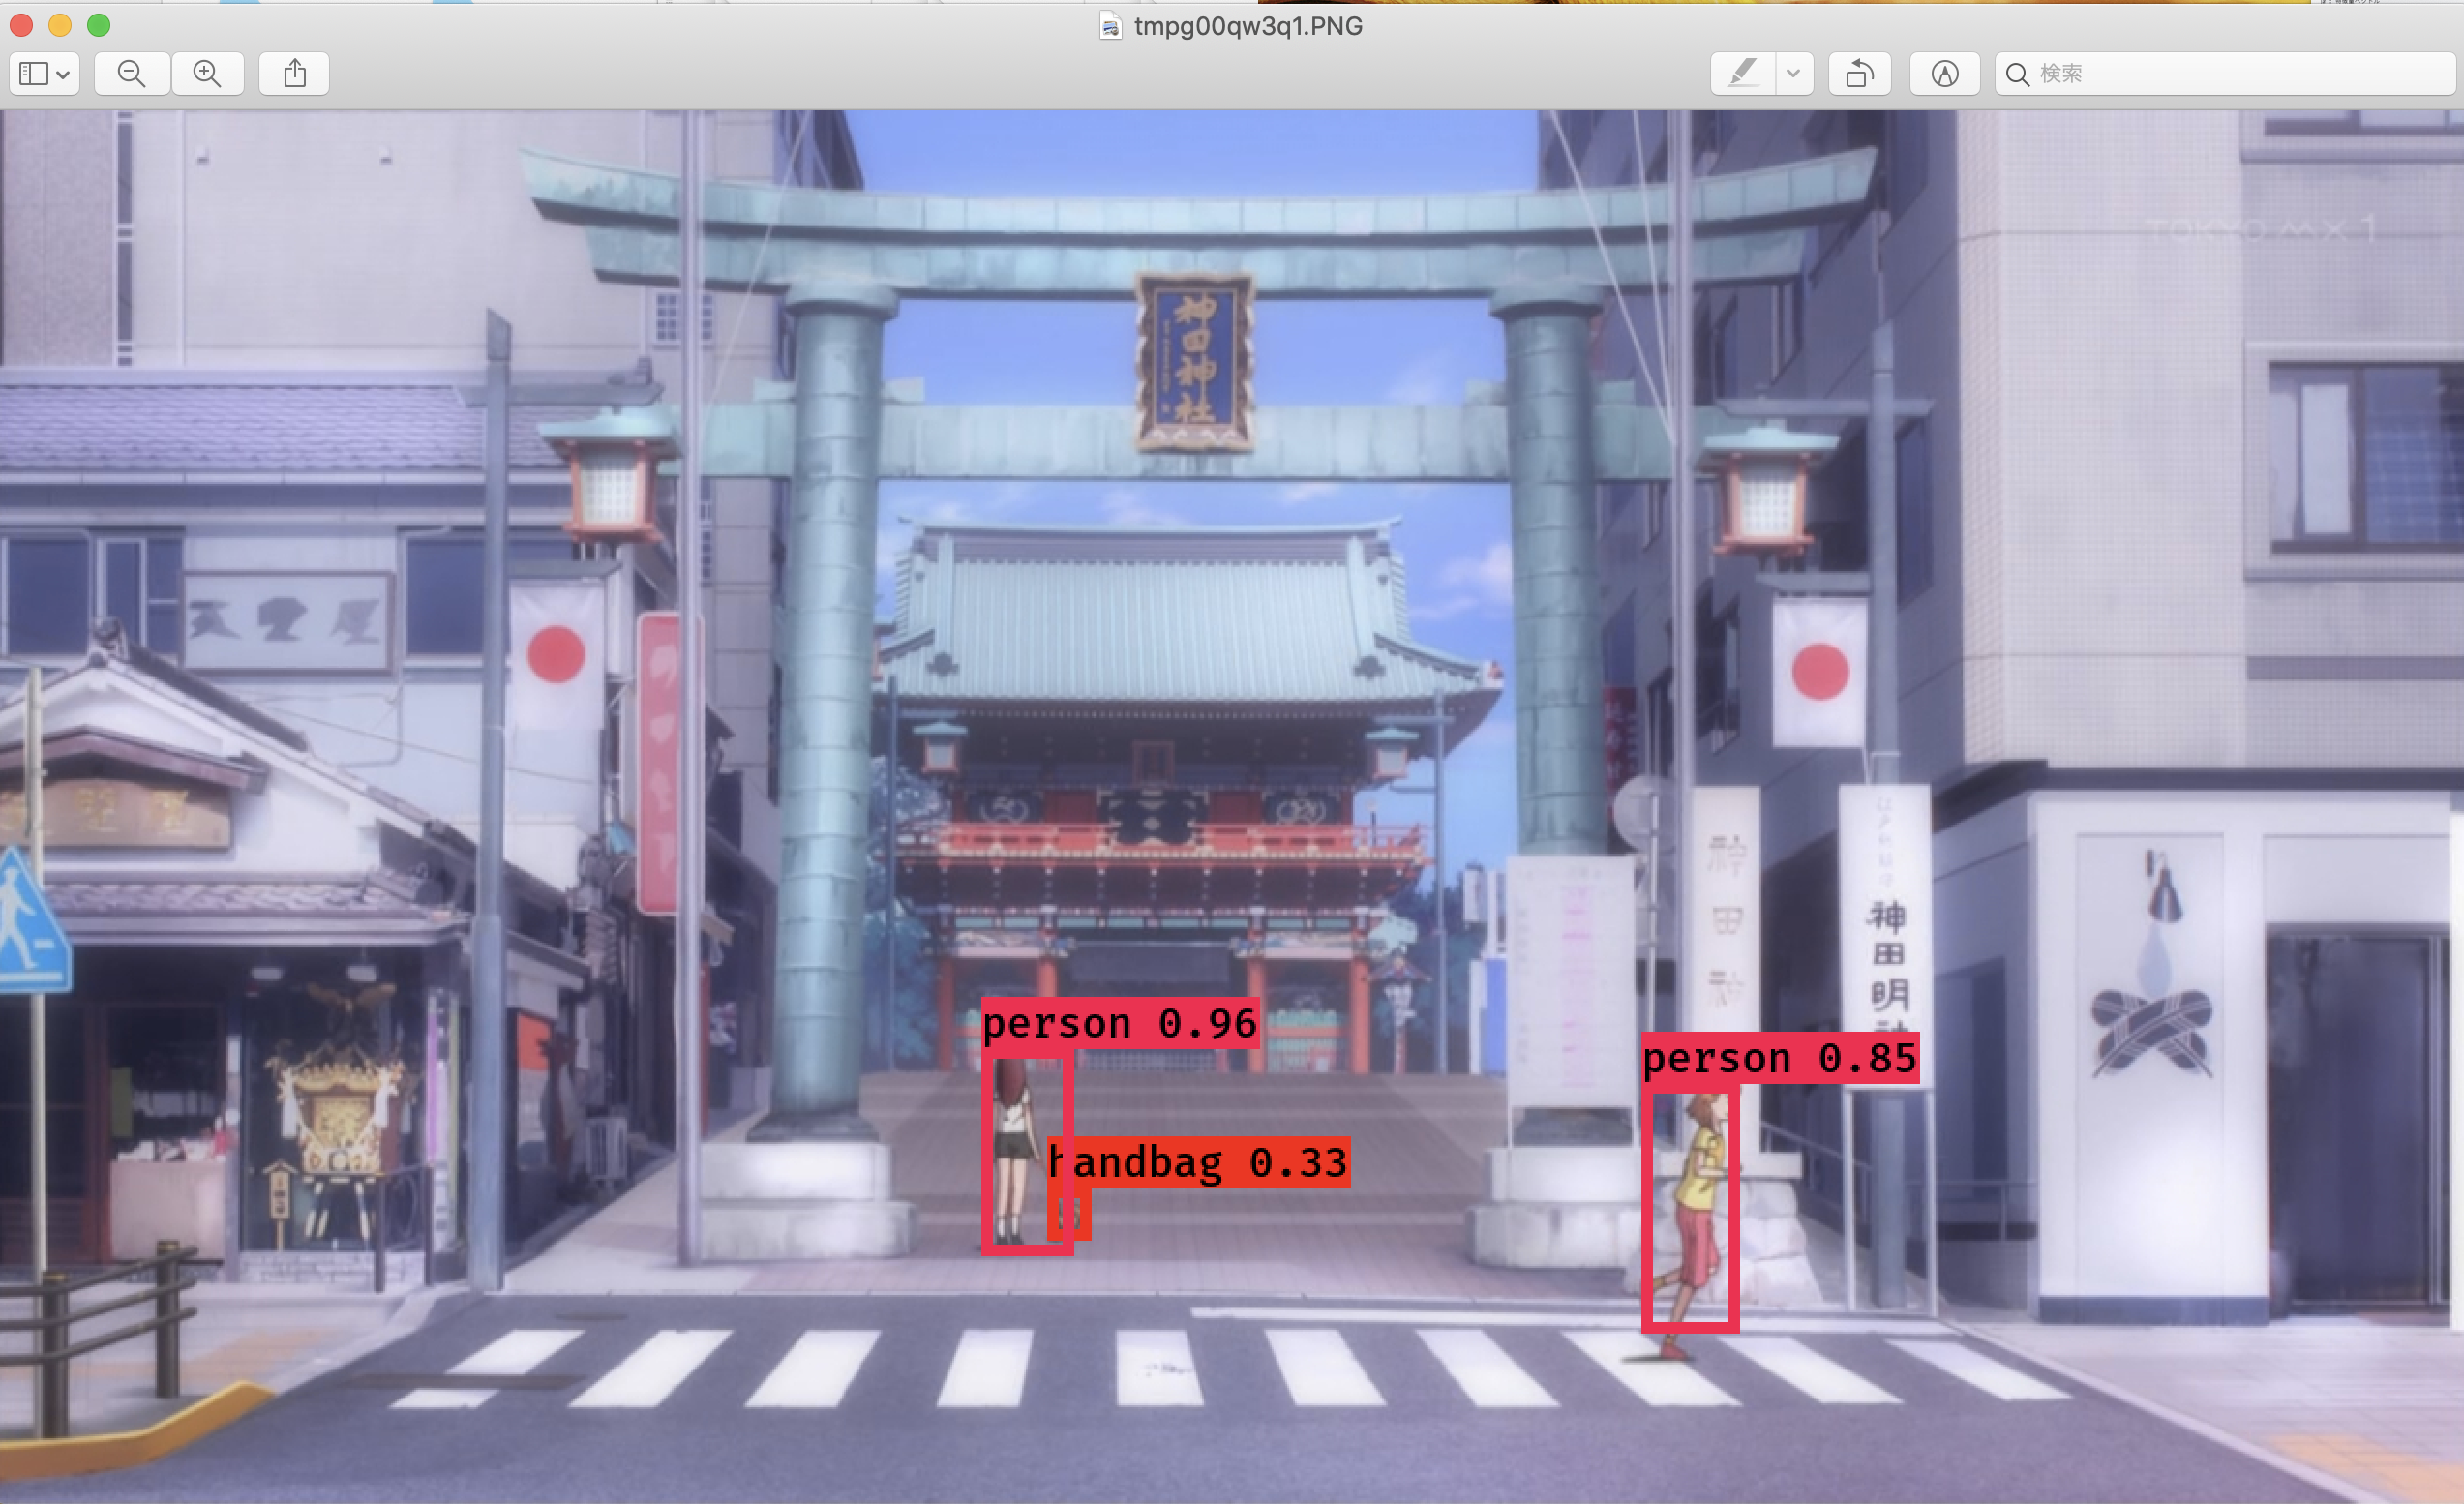

In [0]:
display_png(Image('photo6_predict.png'))

### 画像②についての考察
- 画像②については実写画像ではなく、アニメーションの一部分を画像として保存したものである。
- 分類結果を確認すると、正確に人(person)とカバン(handbag)を分類できており、使用した分類モデルは実写画像だけではなく、アニメーション画像についても適応できる事を確認。

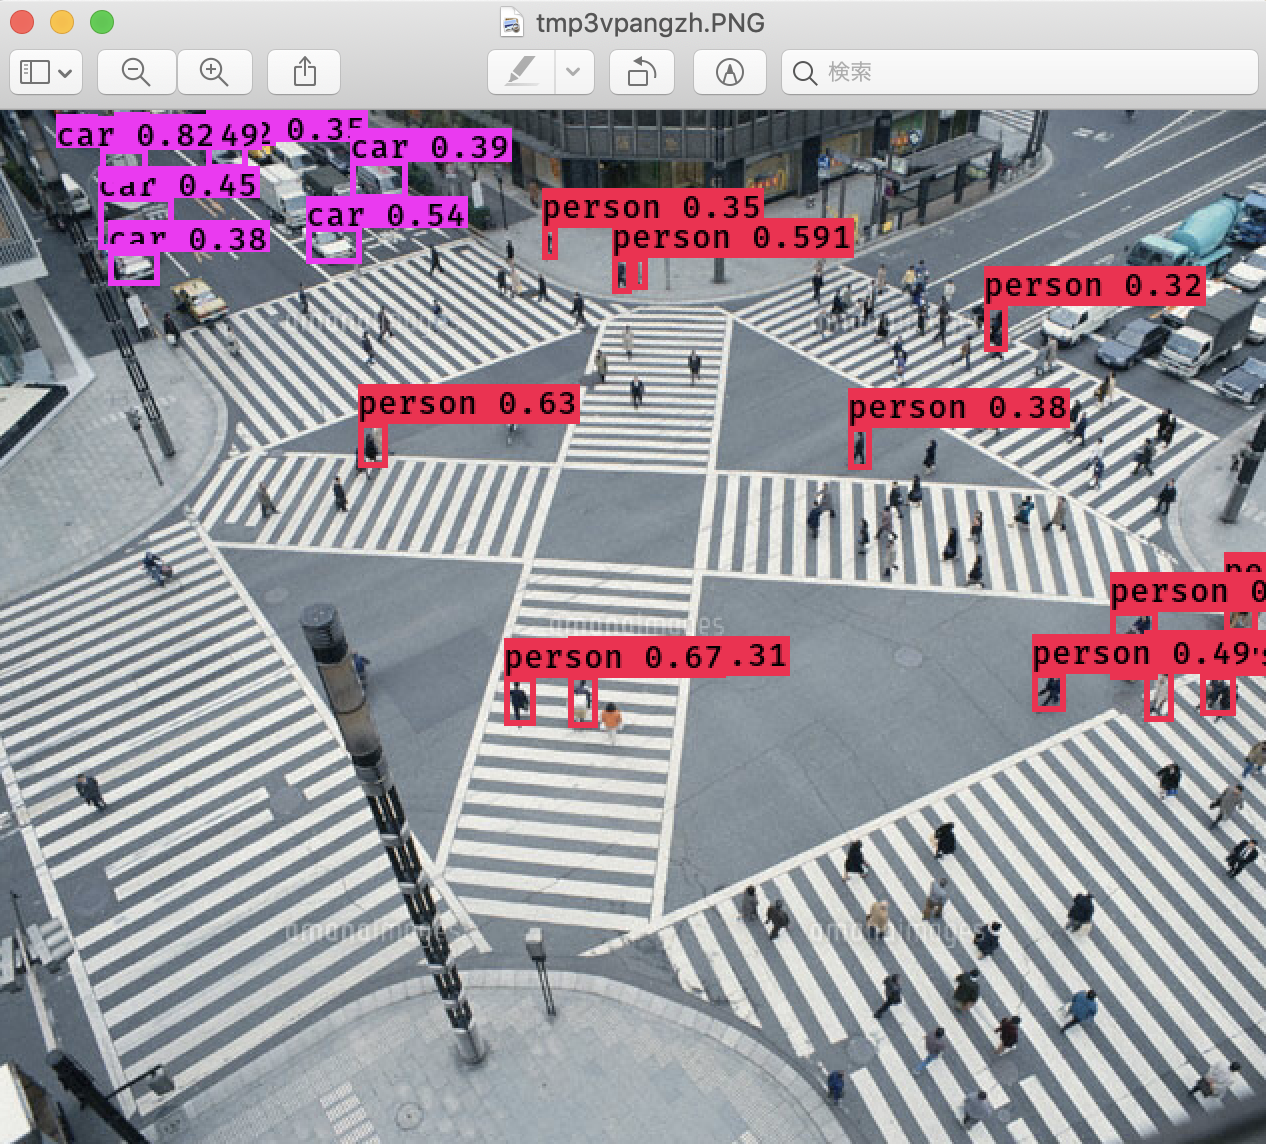

In [0]:
display_png(Image('photo7_predict.png'))

### 画像③についての考察
- 画像③についてはスクランブル交差点を上から撮影した画像である
- 分類結果を確認すると、正確に人(person)と自動車(car)を分類できており、上記の画像のような、被写体(人や自動車)が小さく、また形が捉えずらくなっている画像においても正確に分類できる事を確認。

# 【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingを読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。

アノテーションファイルの形式がSprint18で扱った実装のものとは異なっているので、変換する必要があります。



## 作成するファイル
- シンプソンズデータセットのアノテーションファイルのファイル形式をPascalVOC形式からYOLOv3形式に変換したファイル

### simpsonsデータセットのアノテーションファイル
- 形式→ファイルパス/ファイルネーム,座標,クラスネーム
- 例→simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg,57,72,52,72,abraham_grampa_simpson

### yolov3のアノテーションファイル
- 形式→ファイルパス/ファイルネーム半角スペース座標,クラスナンバー
- 例→path/to/img1.jpg 50,100,150,200,0 30,50,200,120,3

# 【問題5】学習
問題2で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

## カレントディレクトリを変更

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/sprint18/ObjectDetection-master/keras-yolo3-master')

## モデル構築

In [0]:
%run convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.


W0623 06:04:01.840935 139895513958272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 06:04:01.886278 139895513958272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 06:04:01.897470 139895513958272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 06:04:01.919238 139895513958272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0623 06:04:01.920484 1398955139

Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)


W0623 06:04:05.109633 139895513958272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsing section convolutional_12
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_13
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_4
Parsing section convolution

W0623 06:04:59.988334 139895513958272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



Parsing section upsample_0
Parsing section route_1
Concatenating route layers: [<tf.Tensor 'up_sampling2d_1/ResizeNearestNeighbor:0' shape=(?, ?, ?, 256) dtype=float32>, <tf.Tensor 'add_19/add:0' shape=(?, ?, ?, 512) dtype=float32>]
Parsing section convolutional_60
conv2d bn leaky (1, 1, 768, 256)
Parsing section convolutional_61
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_62
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_63
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_64
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_65
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_66
conv2d    linear (1, 1, 512, 255)
Parsing section yolo_1
Parsing section route_2
Parsing section convolutional_67
conv2d bn leaky (1, 1, 256, 128)
Parsing section upsample_1
Parsing section route_3
Concatenating route layers: [<tf.Tensor 'up_sampling2d_2/ResizeNearestNeighbor:0' shape=(?, ?, ?, 128) dtype=float32>, <tf.Tensor 'add_11/ad

## 学習

In [0]:
%run train.py

Create YOLOv3 model with 9 anchors and 47 classes.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 156) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((156,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 156) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((156,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_75 due to mismatch in shape 

Load weights model_data/yolo_weights.h5.
Freeze the first 249 layers of total 252 layers.
Train on 7101 samples, val on 788 samples, with batch size 8.
Epoch 1/5
887/887 [==============================] - 603s 680ms/step - loss: 178.6576 - val_loss: 27.1856
Epoch 2/5
887/887 [==============================] - 594s 670ms/step - loss: 24.5679 - val_loss: 22.1512
Epoch 3/5
887/887 [==============================] - 596s 671ms/step - loss: 21.7518 - val_loss: 21.1056
Epoch 4/5
887/887 [==============================] - 593s 669ms/step - loss: 20.6925 - val_loss: 20.4576
Epoch 5/5
887/887 [==============================] - 596s 672ms/step - loss: 20.0887 - val_loss: 19.8412
Unfreeze all of the layers.
Train on 7101 samples, val on 788 samples, with batch size 8.
Epoch 2/100
887/887 [==============================] - 710s 801ms/step - loss: 17.4152 - val_loss: 16.2670
Epoch 3/100
887/887 [==============================] - 692s 780ms/step - loss: 15.8433 - val_loss: 15.4880
Epoch 4/100
887/88